In [49]:
reset()

In [66]:
%display latex

In [50]:
M=Manifold(4,"M")

In [51]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')

In [52]:
T = M.affine_connection('T',"T")

In [53]:
m=var("m")
k1=var("k1")
k2=var("k2")
k3=var("k3")
T[0,0,0] = 0
T[0,0,1] =0
T[0,1,0]= T[0,0,1]
T[0,1,1] = 0
T[0,2,2] =0
T[0,3,3] = 0
T[1,0,0] =k2/((r-k1)^2)+(r-k1)*k3
T[1,0,1] = 0
T[1,1,1] =0
T[1,2,2] = -r
T[1,3,3] = (-r)*(sin(th))^2
T[2,0,2] = 0
T[2,0,3] = 0
T[2,1,2] =1/(r-k1)
T[2,2,1]=T[2,1,2]
T[2,1,3] = 0
T[2,3,3] = -cos(th)*sin(th)
T[3,0,2] = 0
T[3,0,3] = 0
T[3,1,2] = 0
T[3,1,3] = T[2,1,2]
T[3,3,1]=T[3,1,3]
T[3,2,3] = cos(th)/sin(th)
T[3,3,2]=T[3,2,3]

In [54]:
Riem= T.riemann()

In [55]:
Riem.display_comp(only_nonredundant=True)

X^r_t,t,r = -(k1^3*k3 - 3*k1^2*k3*r + 3*k1*k3*r^2 - k3*r^3 + 2*k2)/(k1^3 - 3*k1^2*r + 3*k1*r^2 - r^3) 
X^r_th,r,th = -k1/(k1 - r) 
X^r_ph,r,ph = -k1*sin(th)^2/(k1 - r) 
X^th_t,t,th = -(k1^3*k3 - 3*k1^2*k3*r + 3*k1*k3*r^2 - k3*r^3 - k2)/(k1^3 - 3*k1^2*r + 3*k1*r^2 - r^3) 
X^th_ph,th,ph = k1*sin(th)^2/(k1 - r) 
X^ph_t,t,ph = -(k1^3*k3 - 3*k1^2*k3*r + 3*k1*k3*r^2 - k3*r^3 - k2)/(k1^3 - 3*k1^2*r + 3*k1*r^2 - r^3) 
X^ph_th,th,ph = -k1/(k1 - r)

In [56]:
Ric = T.ricci()
Ric.display()

3*k3 dt⊗dt

In [57]:
g = M.lorentzian_metric('g')


In [74]:
g[0,0], g[1,1] =  -function("f")(r), 1/function("f")(r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [91]:
g[0,0], g[1,1] = -1, 1


In [92]:
g.display()

g = -dt⊗dt + dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [93]:
dR=Riem.down(g)

In [94]:
uR=Riem.up(g)

In [95]:
Kr = uR.contract(0, 1, 2, 3, dR, 0, 1, 2, 3)
Kr.expr().factor().factor()

2*(3*k1^6*k3^2*r^4 - 18*k1^5*k3^2*r^5 + 45*k1^4*k3^2*r^6 - 60*k1^3*k3^2*r^7 + 45*k1^2*k3^2*r^8 - 18*k1*k3^2*r^9 + 3*k3^2*r^10 + 4*k1^6 - 16*k1^5*r + 24*k1^4*r^2 - 16*k1^3*r^3 + 4*k1^2*r^4 + 6*k2^2*r^4)/((k1 - r)^6*r^4)

In [96]:
func = Kr.expr().subs(k1=1).subs(k2=1).subs(k3=0).factor()
func

4*(5*r^4 - 8*r^3 + 12*r^2 - 8*r + 2)/((r - 1)^6*r^4)

In [84]:
var("F")
value = (4*k1^6 -16* k1^5 * r +24*k1^4 *r^2 -16*k1^3 * r^3 +4*k1^2 * r^4 )* F**2 +6* k2^2 * r^4+(3*r^10-18*k1 *r^9+45*k1^2 *r^8-60*k1^3*r^7+45*k1^4*r^6-18*k1^5*r^5+3*k1^6*r^4)*k3^2 == 0
solve(value, F)


[F == -1/2*sqrt(-3*k1^6*k3^2 + 18*k1^5*k3^2*r - 45*k1^4*k3^2*r^2 + 60*k1^3*k3^2*r^3 - 45*k1^2*k3^2*r^4 + 18*k1*k3^2*r^5 - 3*k3^2*r^6 - 6*k2^2)*r^2/(k1^3 - 2*k1^2*r + k1*r^2), F == 1/2*sqrt(-3*k1^6*k3^2 + 18*k1^5*k3^2*r - 45*k1^4*k3^2*r^2 + 60*k1^3*k3^2*r^3 - 45*k1^2*k3^2*r^4 + 18*k1*k3^2*r^5 - 3*k3^2*r^6 - 6*k2^2)*r^2/(k1^3 - 2*k1^2*r + k1*r^2)]

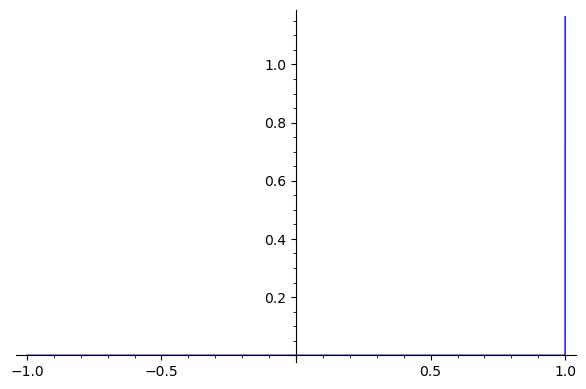

In [101]:
plot(func, r)

In [129]:
fr = (3^(1/2)*k2*r^2)/(2^(1/2)*k1^3-2*2^(1/2)*k1^2 * r +2^(1/2)*k1*r^2)
fr

sqrt(3)*k2*r^2/(sqrt(2)*k1^3 - 2*sqrt(2)*k1^2*r + sqrt(2)*k1*r^2)

In [130]:
plot(fr.subs(k2=1).subs(k1=2), r, -5,5, ymax=1000)